
## SGD set-up for a linear McKean-Vlasov SDE

Consider a McKean-Vlasov (MKV) SDE of the following form:

$$ 
\textrm{d}X_t = (\alpha \, X_t + \beta \, \mathbb{E}[X_t]) \textrm{d} t + \sigma \, \textrm{d} W_t, \quad X_0 = x_0,
$$
for which we know $\mathbb{E}[X_t] = x_0\exp((\alpha+\beta)t).$

- Method 1:
    We approximate the solution $X_t, t \in [0,T]$ by using a piece-wise constant approximation for the function $\mathbb{E}[X_t]:$
    
    \begin{equation}
    \textrm{d}Z_t = \bigl(\alpha \, Z_t + \beta \, \sum^M_{i=1} \widehat{\gamma}_{i-1} \mathbf{1}_{[t_{i-1},t_i[}(t) \bigr) \textrm{d} t + \sigma \, \textrm{d} W_t, \quad Z_0 = x_0.
    \end{equation}
    
    We suppress the dependence of $Z$ on $\widehat{\gamma}$ in the notation. In the above, $t_i := T \frac{i}{M}, i = 0, 1, \ldots, M.$ The gradient process $\xi^i_t:= \partial_{\widehat{\gamma}_i}Z_t, i = 0, \ldots, M,$ is then given as 
    
    \begin{equation}
    \textrm{d}\xi^i_t = \bigl(\alpha \, \xi^i_t + \beta \, \mathbf{1}_{[t_i,t_{i+1}[}(t) \bigr) \textrm{d} t, \quad \xi^i_0 = 0.
    \end{equation}

    In particular, we have 
    \begin{equation}
    \xi^i_t = \begin{cases}
        0 & 0 \leq t \leq t_i \\ 
        \frac{\beta}{\alpha} (\exp(t-t_i) - 1) & t_i < t \leq t_{i+1} \\
        \frac{\beta}{\alpha} (\exp(t_{i+1}-t_i) - 1) & t_{i+1} < t \leq T
    \end{cases}.
    \end{equation}
    
    Our aim is to find the fixed-point of the map $\widehat{\Psi}^{(n)}$ defined as
    \begin{equation}
      \widehat{\Psi}^{(n)}(\widehat{\gamma}):= \mathcal{P}\Bigl(\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)\Bigr).
    \end{equation}
    
    In the linear MKV-SDE considered here, we have $\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)(t) = \mathbb{E}[Z_t].$ We compute the fixed-point by solving the following: 
    \begin{equation}
    \big| \widehat{\gamma} - \widehat{\Psi}^{(n)}(\widehat{\gamma})\big|^2.
    \end{equation}
    
    Using the notation from the Overleaf draft, we have
    
    \begin{equation}
    F_i(\widehat{\gamma}, W) = Z_{t_i} - \widehat{\gamma}_i, \quad \text{and,} \quad \partial_{\widehat{\gamma}_j} F_i(\widehat{\gamma}, W) = \xi^j_{t_{i}} - \delta_{i}(j).
    \end{equation}

- Method 2:  
    We approximate the solution $X_t, t \in [0,T]$ by using a polynomial approximation for the function $\mathbb{E}[X_t]:$
    
    \begin{equation}
    \textrm{d}Z_t = \bigl(\alpha \, Z_t + \beta \, \sum^{K}_{k=1} \widehat{\gamma}_k \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \bigr) \textrm{d} t + \sigma \, \textrm{d} W_t, \quad Z_0 = x_0.
    \end{equation}
    
    In the above, nodes $\{t_1, \ldots, t_K \},$ are chosen appropriately, either Chebychev or Lagrange nodes. The gradient process $\xi^k_t:= \partial_{\widehat{\gamma}_k}Z_t, k = 1, \ldots, K,$ is then given as 
    
    \begin{equation}
    \textrm{d}\xi^k_t = \bigl(\alpha \, \xi^k_t + \beta \, \prod_{\substack{ 1\leq j \leq M \\ k\neq j}} \frac{t-t_j}{t_k - t_j} \bigr) \textrm{d} t, \quad \xi^k_0 = 0.
    \end{equation}

    We disretise the time interval $[0, T]$ uniformly into $M + 1$ steps, and insert Chebychev nodes to create a final time grid with $M+K$ intermediate points to generate discretised path of $Z$ and gradient processes. Our aim is to find the fixed-point of the map $\widehat{\Psi}^{(M+K)}$ defined as
    \begin{equation}
      \widehat{\Psi}^{(M+K)}(\widehat{\gamma}):= \mathcal{P}\Bigl(\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)\Bigr).
    \end{equation}
    
    In the linear MKV-SDE considered here, we have $\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)(t) = \mathbb{E}[Z_t].$ We compute the fixed-point by solving the following: 
    \begin{equation}
    \big| \widehat{\gamma} - \widehat{\Psi}^{(M+K)}(\widehat{\gamma})\big|^2.
    \end{equation}
    
    Using the notation from the Overleaf draft, we have
    
    \begin{equation}
    F_i(\widehat{\gamma}, W) = Z_{t_i} - \widehat{\gamma}_i, \quad \text{and,} \quad \partial_{\widehat{\gamma}_j} F_i(\widehat{\gamma}, W) = \xi^j_{t_{i}} - \delta_{i}(j).
    \end{equation}

### Implementation for Method 2

#### *Import relevant libraries*

In [1]:
import random
import math
import numpy
from numpy import pi
import matplotlib.pyplot as plt

#### *Import plot libraries*

In [4]:
from res.plot_lib import plot_data, plot_model, set_default
set_default()

#### *Chebyvchev nodes*

In [5]:
def CC_nodes(a, b, n):
    i = numpy.array(range(n))
    x = numpy.cos((2 * i + 1) * pi /(2 * n))
    z = 0.5 * (b-a) * x + 0.5 * (b + a)
    return numpy.flip(z, 0)

#### *Parameters*

In [18]:
M = 50  # number of discretisation steps
K = 10  # number of Chebychev nodes
x0 = 10
sigma = 1
alpha = - 0.5
beta = 0.3
T = 1.0
dt = T / M
max_iter = 100000

#### *Compute time grid and factors in polynomial approximation*

In [19]:
tspace = numpy.linspace(0, T, M + 1, dtype=float) # discretisation points
tnodes = CC_nodes(0, T, K) # Chebychev nodes

tspace = numpy.concatenate((tspace, tnodes), axis=0)
tspace.sort()

#identify the indices of Chebychev nodes in the time discretisation array
tnodes_idx = numpy.zeros(K, dtype=int)
tspace_ceil = numpy.uint(numpy.ceil(tspace * M / T))
tspace_err = numpy.around(numpy.abs(tspace * M / T - tspace_ceil), 4)

ctr = 0
for j in range(M+K+1):
    if tspace_err[j] != 0.0 and tspace_err[j] != 1.0:
        tnodes_idx[ctr] = j
        ctr += 1
        
tspace_fact = numpy.ones((M + K, K)) # M + K time factors for K different Chebychev nodes, t = 0 not required
tnode_prod = numpy.zeros(K) 

# compute products in the denominator of polynomial approxmiation factor
for k in range(K):
    temp_prod = tnodes[k] - numpy.delete(tnodes, k)
    tnode_prod[k] = numpy.prod(temp_prod)

# compute time factors in the polynomial approxmiation
for i in range(M+K):
    for k in range(K):
        temp_prod = tspace[i + 1] - numpy.delete(tnodes, k)
        tspace_fact[i][k] =  numpy.prod(temp_prod) / tnode_prod[k]
        
gamma_benchmark = x0 * numpy.exp((alpha + beta) * tspace)
print(gamma_benchmark)

[10.          9.98769592  9.96007989  9.92031915  9.89159835  9.88071713
  9.8412732   9.80198673  9.7628571   9.72388367  9.71135453  9.68506582
  9.64640293  9.60789439  9.56953957  9.53133787  9.49328867  9.46862918
  9.45539136  9.41764534  9.38005     9.34260474  9.30530896  9.26816207
  9.23116346  9.19431256  9.19103488  9.15760877  9.1210515   9.08464016
  9.04837418  9.01225297  8.97627596  8.94044258  8.90792782  8.90475223
  8.86920437  8.83379841  8.79853379  8.76340995  8.72842632  8.69358235
  8.65887748  8.64677175  8.62431115  8.58988281  8.5555919   8.52143789
  8.48742022  8.45353835  8.43065455  8.41979173  8.38617983  8.35270211
  8.31935804  8.28614707  8.27703192  8.25306868  8.22012235  8.19739367
  8.18730753]


#### *Define linear MKV SDE class*

In [23]:
class MKVSDElinear_approx():
    def __init__(self, M, K):
        super().__init__()
        self.path = numpy.zeros(M+K+1)
    def generatepath(self, x0, gamma, alpha, beta, sigma, M, K, tspace, dW):
        self.path[0] = x0
        for i in range(M+K):
            dt = tspace[i+1] - tspace[i]
            self.path[i+1] = self.path[i] * (1 + alpha * dt) + beta * dt \
            * numpy.dot(gamma, tspace_fact[i]) \
            + sigma * dt ** 0.5 * dW[i]
                
# seed initialise
random.seed(42)

# calculate deterministic gradient 
Z_grad = numpy.zeros((K,M+K+1))
for k in range(K):
    Z_grad[k][0] = 0
    for i in range(M+K):
        dt = tspace[i+1] - tspace[i]
        Z_grad[k][i+1] = Z_grad[k][i] * (1 + alpha * dt) \
        + beta * tspace_fact[i][k] * dt

# print(Z_grad[1])
# gamma = x0 * numpy.random.randn(K)
# Z = MKVSDElinear_approx(M, K)
# dW = numpy.random.randn(M+K)
# Z.generatepath(x0, gamma, alpha, beta, sigma, M, K, tspace, dW)
# plt.plot(tnodes, Z.path[tnodes_idx])

#### SGD

In [21]:
lr = 0.01 # learning rate
l2pen = 0 # l2 penalization parameter
error_tol = 10e-6 # error tolerance
ctr = 0 # iteration counter
error = 1000
gamma = 2.5 * x0 * numpy.ones(K)
Z = MKVSDElinear_approx(M, K)
gamma_aver = numpy.zeros(K)

jacobian = numpy.zeros((K,K))

for i in range(K):
    for j in range(K):
        jacobian[i][j] = Z_grad[j][tnodes_idx[i]]
jacobian = jacobian - numpy.eye(K)

while ctr < max_iter and error > error_tol:
    dW = numpy.random.randn(M+K)
    Z.generatepath(x0, gamma, alpha, beta, sigma, M, K, tspace, dW)
    loss_grad = 2 * (Z.path[tnodes_idx] - gamma)
    gamma_prev = gamma
    
    gamma = gamma_prev * (1 - l2pen) - lr * numpy.matmul(loss_grad, jacobian)    
    gamma_aver += gamma

    if (ctr + 1) % 20000 == 0:
        print('Iteration: [{}/{}] '.format(ctr, max_iter))
        lr = lr / 2
    ctr += 1

print(gamma_aver / max_iter)

Iteration: [19999/100000] 
Iteration: [39999/100000] 
Iteration: [59999/100000] 
Iteration: [79999/100000] 
Iteration: [99999/100000] 
[9.99548965 9.90011433 9.71851236 9.47355272 9.1919644  8.90708919
 8.64525558 8.42828601 8.2746249  8.19556082]


0.03828382836935518


Text(0.5, 1.0, 'N = 100000, M = 50, K = 10, T = 1.0')

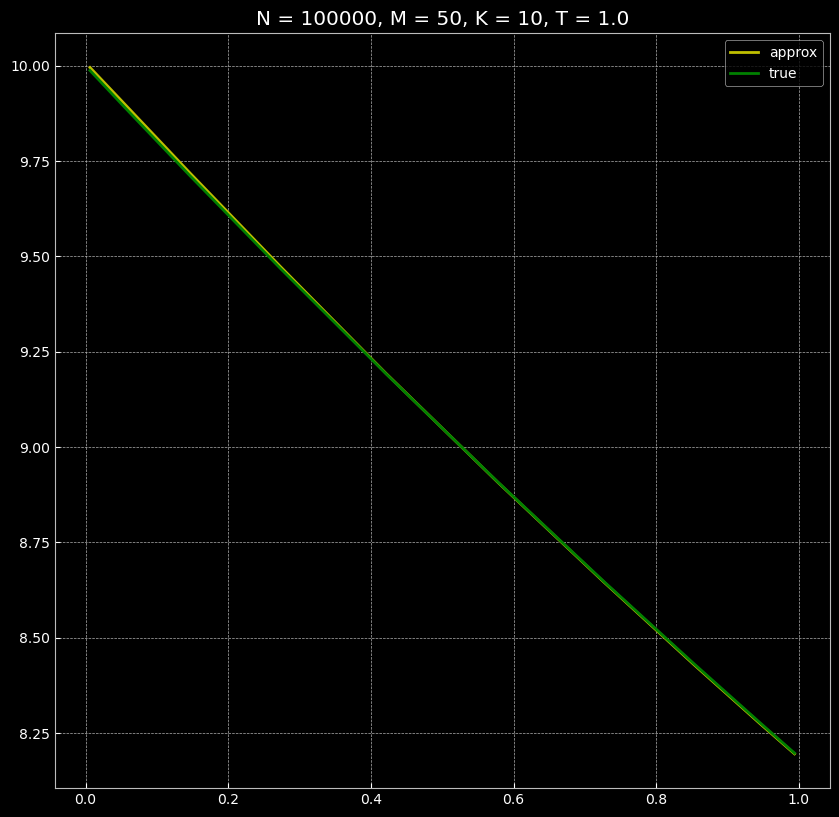

In [22]:
print(numpy.sum(numpy.abs(gamma_aver / max_iter - gamma_benchmark[tnodes_idx])))
plt.plot(tspace[tnodes_idx], gamma_aver / max_iter, 'y', label='approx')
plt.plot(tspace[tnodes_idx], gamma_benchmark[tnodes_idx], 'g', label='true')
plt.legend()
plt.title('N = ' + str(max_iter) + ', M = ' + str(M) + ', K = ' + str(K) + ', T = ' + str(T))